In [182]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [183]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Courses/IntroToML/Datasets/HW1.csv'
df = pd.DataFrame(pd.read_csv(file_path))

df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100

In [184]:
df.describe()

,X1,X2,X3,Y
count,100.000000,100.000000,100.000000,100.000000
mean,2.000000,2.000000,1.960000,1.851276
std,1.172181,1.172154,1.163005,2.774643
min,0.000000,0.070303,0.027879,-5.332455
25%,1.000000,0.979394,0.952121,0.527533
50%,2.000000,2.009697,1.949091,2.879003
75%,3.000000,3.040000,2.946061,3.925389
max,4.000000,3.949091,3.943030,5.545892


In [185]:
X1 = df.values[:, 0]  # input values from X1
X2 = df.values[:, 1]  # input values from X2
X3 = df.values[:, 2]  # input values from X3
y = df.values[:, 3] # input values from y
m = len(y)  # Number of training examples

In [186]:
X_0 = np.ones((m, 1)) # column vector of ones

# Combining to the values in the X1 column with the column vector of ones to make a matrix
X_1 = X1.reshape((m, 1))
X1 = np.hstack((X_0, X_1))

# Doing the same for X2
X_2 = X2.reshape((m, 1))
X2 = np.hstack((X_0, X_2))

# Doing the same for X3
X_3 = X3.reshape((m, 1))
X3 = np.hstack((X_0, X_3))

# checking to see if it worked as intended
X1[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [187]:
# gotta define theta as an array of two values
theta = np.zeros(2)
theta

array([0., 0.])

In [188]:
# Creating functions to compute cost and run gradient decent algorithm

# Essentially we set up the full equation to compute the cost and return what it equals
def compute_cost(X, y, theta):
 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [189]:
# just a little testing to see a correct output from the compute_cost function
cost = compute_cost(X1, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [190]:
theta = [0., 0.]
iterations = 140;
alpha = 0.1;

theta, cost_history = gradient_descent(X1, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.67458195 -1.93972493]
cost_history = [5.16999006 4.96338989 4.7855721  4.61848888 4.45916697 4.30689303
 4.16130255 4.02209431 3.88898736 3.76171412 3.64001888 3.52365717
 3.41239525 3.30600959 3.2042865  3.10702162 3.01401956 2.9250935
 2.8400648  2.75876264 2.68102372 2.60669185 2.53561773 2.46765857
 2.40267785 2.34054503 2.28113532 2.22432934 2.170013   2.11807718
 2.06841755 2.02093435 1.9755322  1.93211988 1.89061019 1.85091975
 1.81296882 1.77668116 1.74198388 1.70880727 1.6770847  1.64675243
 1.61774953 1.59001774 1.56350135 1.53814709 1.51390403 1.49072347
 1.46855885 1.44736563 1.42710125 1.40772499 1.38919794 1.37148287
 1.3545442  1.33834789 1.32286143 1.30805369 1.29389492 1.28035669
 1.2674118  1.25503425 1.24319917 1.23188278 1.22106236 1.21071616
 1.2008234  1.19136421 1.1823196  1.17367137 1.16540218 1.1574954
 1.14993515 1.14270624 1.13579415 1.129185   1.1228655  1.11682297
 1.11104527 1.10552079 1.10023842 1.09518757 1.09035808 1.08574025


Text(0.5, 1.0, 'Convergence of gradient descent for explanatory variable: X1')

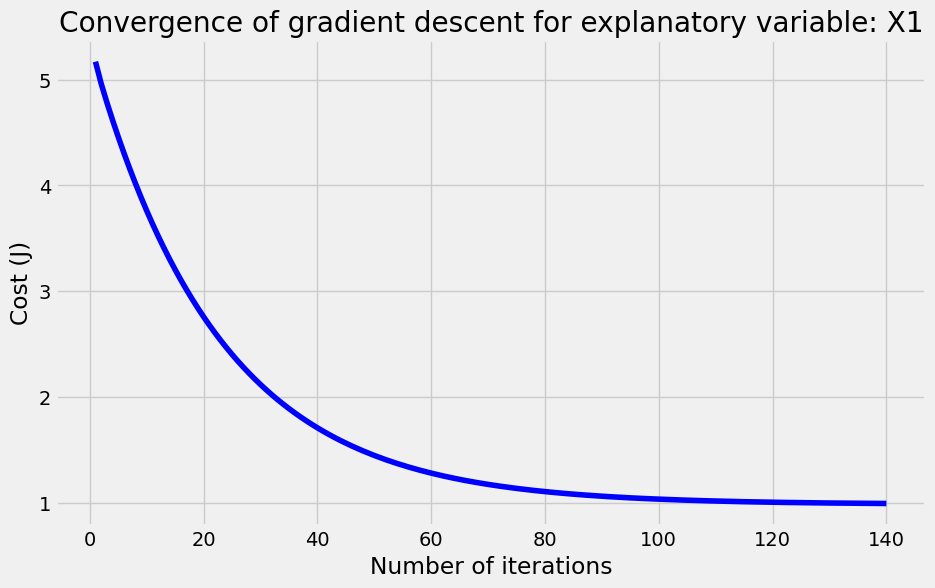

In [191]:
# Plotting X1's convergence of gradient descent

#using style from assignment 0
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
# Plot the graph
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for explanatory variable: X1')

In [192]:
theta = [0., 0.]
iterations = 15;
alpha = 0.05;

theta, cost_history = gradient_descent(X2, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [0.35351034 0.70304796]
cost_history = [4.5369622  4.06234927 3.83409365 3.72418051 3.6711185  3.64537047
 3.6327483  3.62643665 3.62316171 3.6213508  3.62024836 3.61949136
 3.6189053  3.61840625 3.61795379]


Text(0.5, 1.0, 'Convergence of gradient descent for explanatory variable: X2')

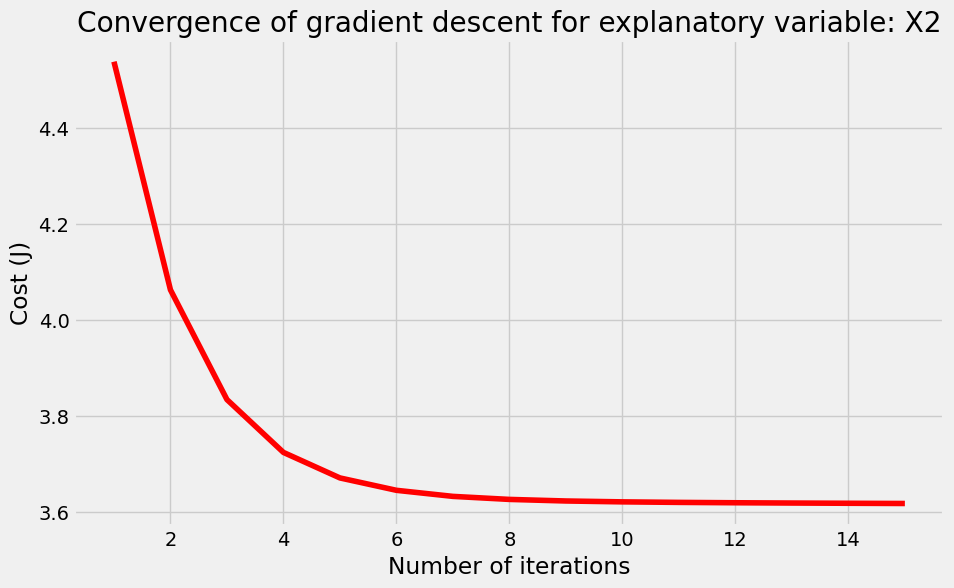

In [193]:
# Convergence of gradient descent for X2
plt.plot(range(1, iterations + 1),cost_history, color='red')
plt.rcParams["figure.figsize"] = (10,6)
# Plot the graph
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for explanatory variable: X2')

In [194]:
theta = [0., 0.]
iterations = 150;
alpha = 0.1;

theta, cost_history = gradient_descent(X3, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 2.78358219 -0.4857427 ]
cost_history = [4.66843939 4.49602325 4.43685075 4.39757676 4.3628731  4.3301743
 4.29900486 4.26923359 4.240788   4.21360745 4.18763542 4.16281813
 4.13910424 4.11644469 4.09479259 4.07410317 4.05433361 4.03544302
 4.01739232 4.00014417 3.98366289 3.96791437 3.95286604 3.93848678
 3.92474683 3.91161776 3.89907242 3.88708486 3.87563028 3.86468497
 3.8542263  3.84423263 3.83468329 3.82555851 3.81683943 3.80850801
 3.80054701 3.79293996 3.78567113 3.77872547 3.77208862 3.76574686
 3.75968705 3.75389666 3.74836372 3.74307678 3.7380249  3.73319763
 3.72858498 3.72417742 3.71996582 3.71594147 3.71209604 3.70842159
 3.7049105  3.70155552 3.69834971 3.69528643 3.69235934 3.6895624
 3.68688981 3.68433604 3.68189582 3.67956409 3.67733603 3.67520703
 3.67317269 3.67122879 3.66937133 3.66759645 3.66590048 3.66427991
 3.6627314  3.66125173 3.65983785 3.65848684 3.65719589 3.65596234
 3.65478363 3.65365733 3.6525811  3.65155273 3.65057007 3.64963111


Text(0.5, 1.0, 'Convergence of gradient descent for explanatory variable: X3')

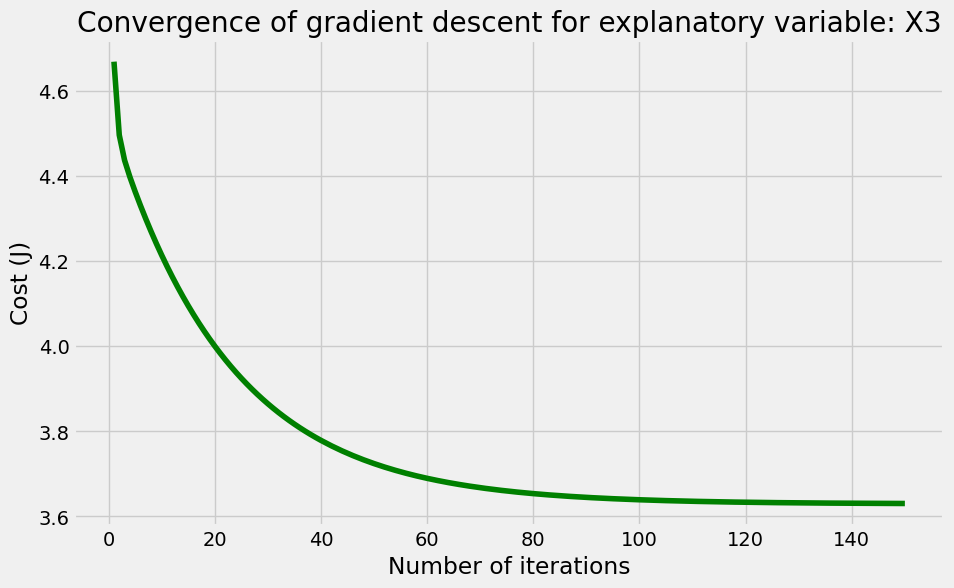

In [195]:
# Convergence of gradient descent for X3
plt.plot(range(1, iterations + 1),cost_history, color='green')
plt.rcParams["figure.figsize"] = (10,6)
# Plot the graph
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for explanatory variable: X3')

In [196]:
# Putting variables into one matrix
Xall = np.hstack((X_0, X_1, X_2, X_3))
Xall[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [197]:
# theta needs to be a vector of four elements
theta = np.zeros(4)

In [198]:
theta = [0., 0., 0., 0.]
iterations = 300;
alpha = 0.1;

theta, cost_history = gradient_descent(Xall, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.05712634 -1.967408    0.57503774 -0.2279249 ]
cost_history = [4.13064348 3.51770697 3.12758306 2.84173082 2.6232134  2.45337153
 2.31980849 2.21352203 2.12782089 2.05770031 1.99940853 1.95012933
 1.90774619 1.87066655 1.83769052 1.80791283 1.78064937 1.75538231
 1.7317189  1.70936057 1.68807977 1.66770254 1.64809537 1.62915539
 1.61080291 1.59297582 1.57562536 1.5587129  1.54220757 1.52608438
 1.51032287 1.49490602 1.4798195  1.46505102 1.45058989 1.43642665
 1.42255284 1.40896075 1.39564327 1.38259381 1.36980617 1.35727446
 1.3449931  1.3329567  1.32116011 1.30959833 1.29826652 1.28715998
 1.27627412 1.26560449 1.25514673 1.2448966  1.23484993 1.22500266
 1.21535081 1.20589048 1.19661787 1.18752924 1.17862092 1.16988935
 1.161331   1.15294244 1.1447203  1.13666127 1.12876211 1.12101965
 1.11343079 1.10599247 1.09870171 1.09155559 1.08455122 1.0776858
 1.07095657 1.06436083 1.05789594 1.05155929 1.04534834 1.0392606
 1.03329363 1.02744502 1.02171243 1.0160935

Text(0.5, 1.0, 'Convergence of gradient descent for explanatory variable: X3')

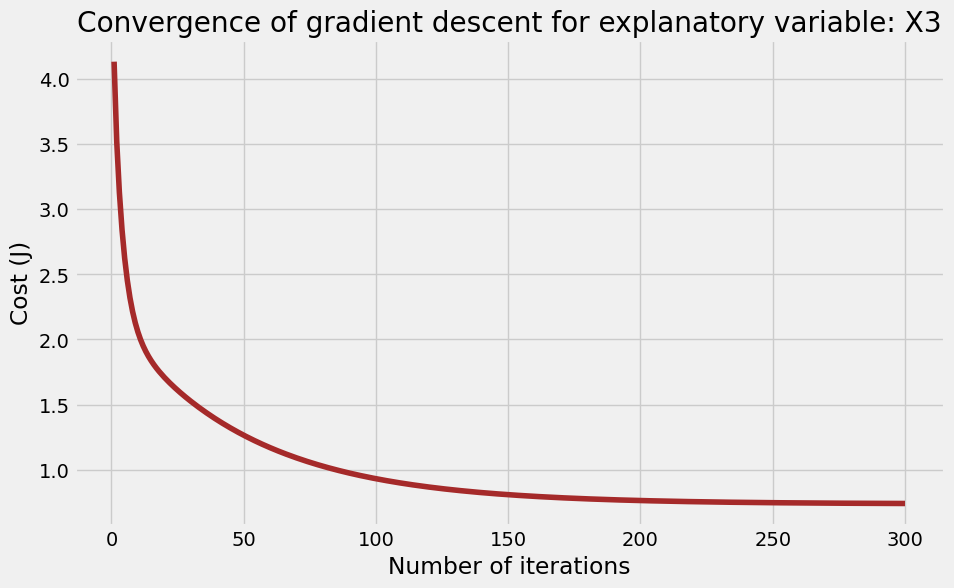

In [199]:
# Convergence of gradient descent for Xall
plt.plot(range(1, iterations + 1),cost_history, color='brown')
plt.rcParams["figure.figsize"] = (10,6)
# Plot the graph
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for explanatory variable: X3')

In [200]:
# Predicting Y for new values of X1, X2, and X3

# Creating the arrays to cross multiply while adding a bias term
newValues1 = [1, 1, 1, 1]
newValues2 = [1, 2, 0, 4]
newValues3 = [1, 3, 2, 1]

# Outputing predicted y values
print(f"For Input (1, 1, 1), Predicted y is {np.dot(newValues1, theta)}")
print(f"For Input (2, 0, 4), Predicted y is {np.dot(newValues2, theta)}")
print(f"For Input (3, 2, 1), Predicted y is {np.dot(newValues3, theta)}")

For Input (1, 1, 1), Predicted y is 3.436831183988773
For Input (2, 0, 4), Predicted y is 0.21061073162934685
For Input (3, 2, 1), Predicted y is 0.07705292923353202
